In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 'battery' and 'sum_production' = generated by our beloved Kalman filter
# 'timestamp' and 'solar' = from the original dataset

columns = ['timestamp', 'battery', 'solar', 'sum_production']
df = pd.read_csv('my_data.csv', names=columns)
df['timestamp'] = pd.to_datetime(df['timestamp'])
schedule = df['solar'].mean()
df

,timestamp,battery,solar,sum_production
0,2024-01-01 10:00:00.368000+00:00,378.415000,1327,1705.415000
1,2024-01-01 10:00:02.370000+00:00,465.712297,1225,1690.712297
2,2024-01-01 10:00:05.876000+00:00,529.518811,1165,1694.518811
3,2024-01-01 10:00:08.882000+00:00,505.515268,1204,1709.515268
4,2024-01-01 10:00:11.890000+00:00,343.150252,1390,1733.150252
...,...,...,...,...
1195,2024-01-01 10:59:47.222000+00:00,756.458344,946,1702.458344
1196,2024-01-01 10:59:50.228000+00:00,776.919771,925,1701.919771
1197,2024-01-01 10:59:53.234000+00:00,786.737869,917,1703.737869
1198,2024-01-01 10:59:56.238000+00:00,799.273635,904,1703.273635


<Axes: xlabel='timestamp', ylabel='solar'>

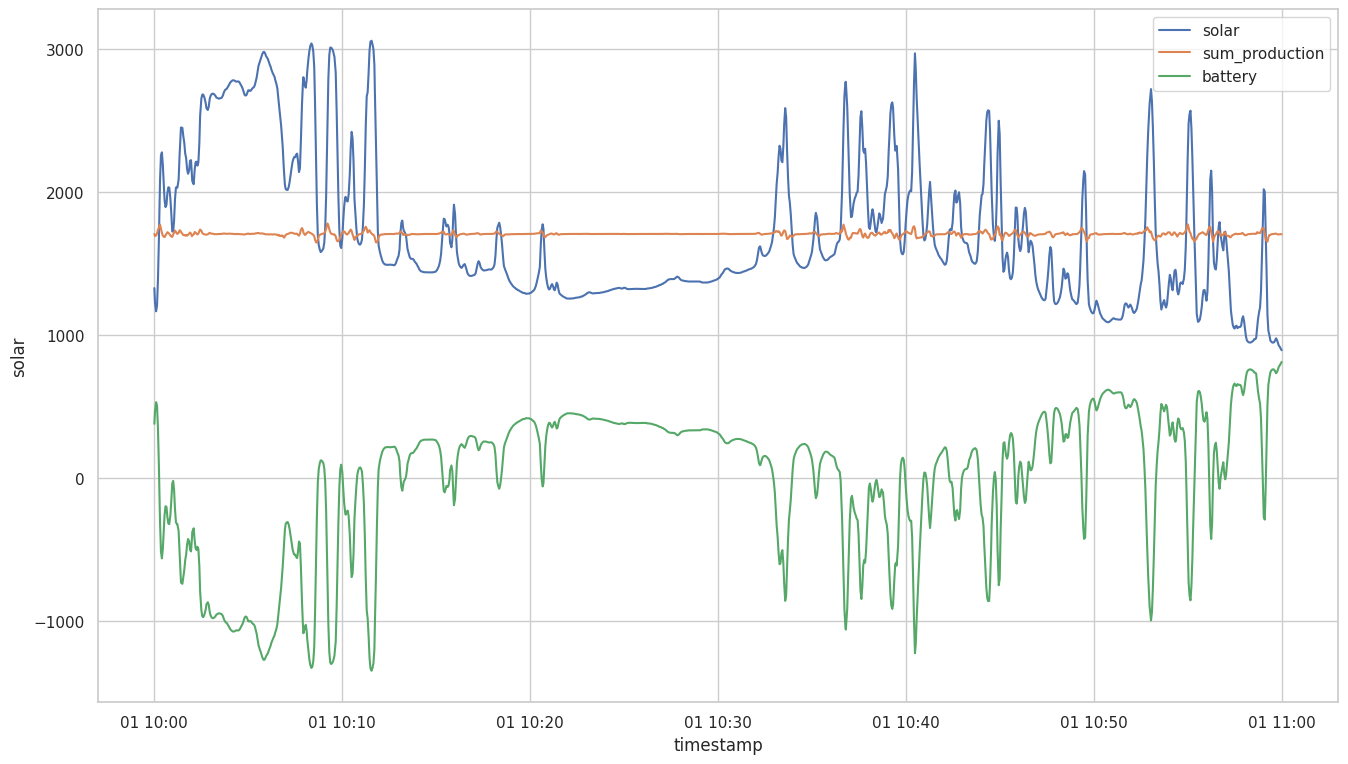

In [8]:
sns.set(style='whitegrid')
plt.figure(figsize=(16, 9))
sns.lineplot(x='timestamp', y='solar', data=df, label='solar')
sns.lineplot(x='timestamp', y='sum_production', data=df, label='sum_production')
sns.lineplot(x='timestamp', y='battery', data=df, label='battery')

<Axes: xlabel='timestamp', ylabel='solar'>

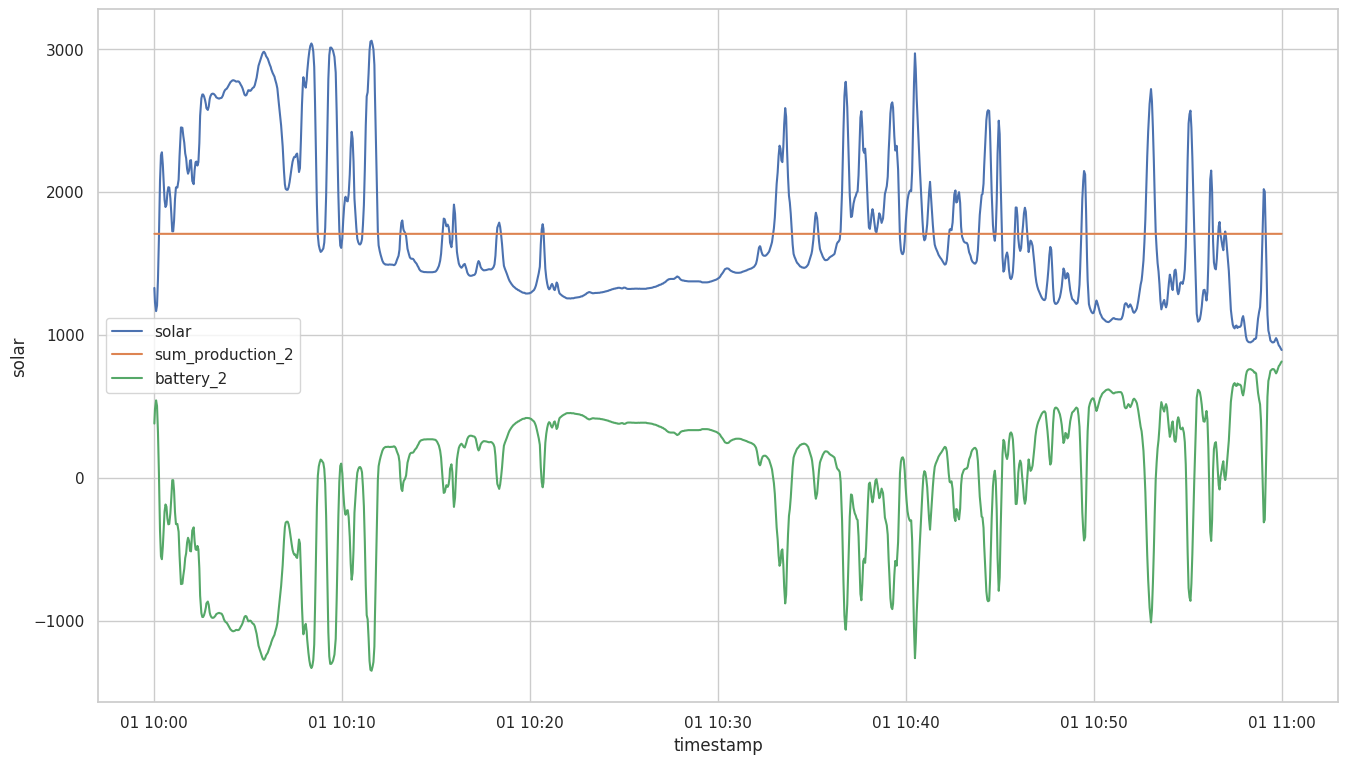

In [9]:
df['battery_2'] = 0 - df['solar'] + schedule # do we really need the Kalman filter?
df['sum_production_2'] = df['battery_2'] + df['solar']

plt.figure(figsize=(16, 9))
sns.lineplot(x='timestamp', y='solar', data=df, label='solar')
sns.lineplot(x='timestamp', y='sum_production_2', data=df, label='sum_production_2')
sns.lineplot(x='timestamp', y='battery_2', data=df, label='battery_2')

<Axes: xlabel='timestamp', ylabel='battery'>

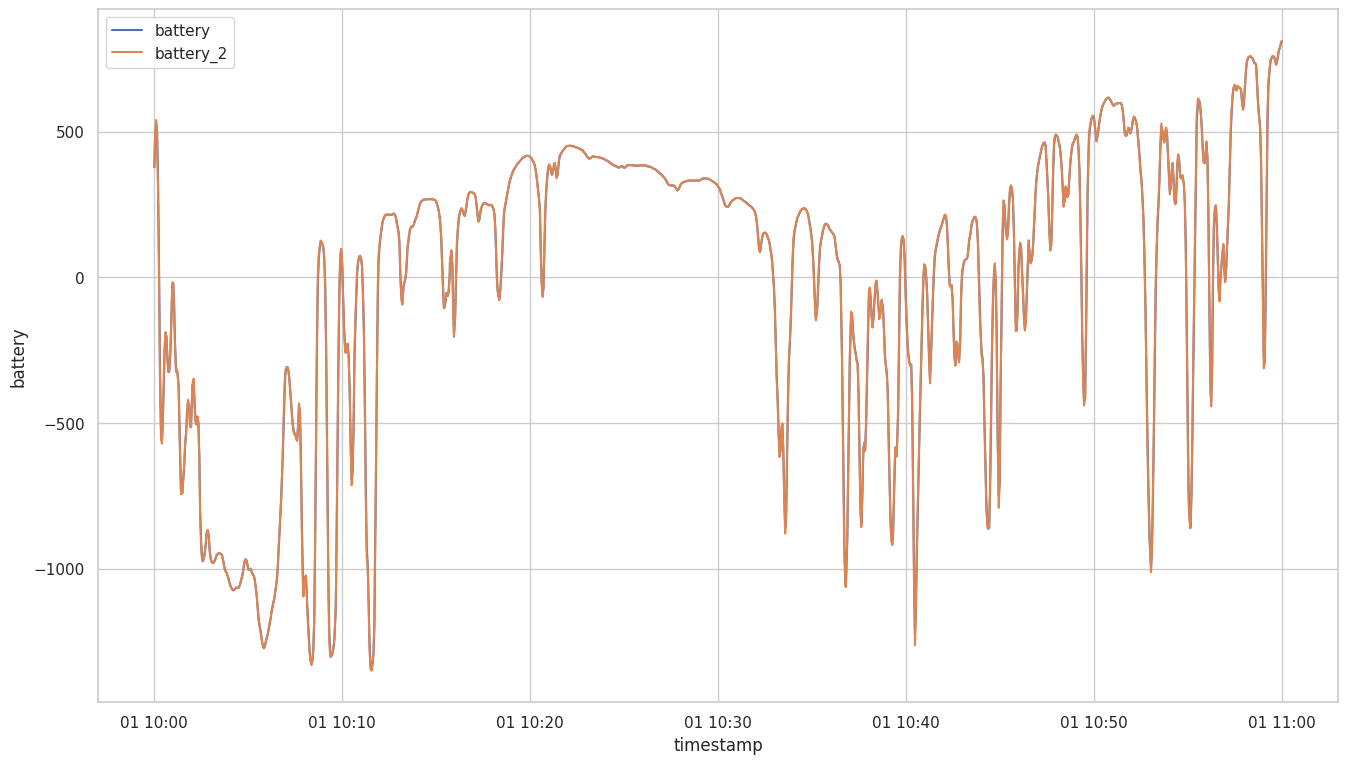

In [10]:
plt.figure(figsize=(16, 9))
sns.lineplot(x='timestamp', y='battery', data=df, label='battery')
sns.lineplot(x='timestamp', y='battery_2', data=df, label='battery_2')